In [1]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
LIOEKF_os1_cloud_node_imu = np.loadtxt('../../dataset/rosbag/newer_college/64beam/01_short/00/lio_ekf_01.txt', usecols=(1,2,3), unpack=True)
LIOEKF_IN_PIN_os1_cloud_node_imu = np.loadtxt('../../dataset/rosbag/newer_college/64beam/01_short/00/pin_lio_ekf_odo.txt', usecols=(1,2,3), skiprows=65, unpack=True)
# LIOEKF_IN_PIN_camera_imu = np.loadtxt('../dataset/rosbag/m2dgr/street_03/handsfree_imu/pin_lio_ekf_odo_camera.txt', usecols=(1,2,3), skiprows=63, unpack=True)
# LIOEKF_IN_PIN_dvs_imu = np.loadtxt('../dataset/rosbag/m2dgr/street_03/handsfree_imu/pin_lio_ekf_odo_dvs.txt', usecols=(1,2,3), skiprows=63, unpack=True)
pin_odom = np.loadtxt('../../dataset/rosbag/newer_college/64beam/01_short/00/odom_poses_kitti.txt', delimiter=' ', usecols=(3, 7, 11), unpack=True)
pin_slam = np.loadtxt('../../dataset/rosbag/newer_college/64beam/01_short/00/slam_poses_kitti.txt', delimiter=' ', usecols=(3, 7, 11), unpack=True)

In [3]:
trans = np.array([[-1.0,  0.0,  0.0],
                  [0.0, -1.0,  0.0],
                  [0.0,  0.0,  1.0]])

LIOEKF_os1_cloud_node_imu = np.linalg.inv(trans) @ LIOEKF_os1_cloud_node_imu
LIOEKF_IN_PIN_os1_cloud_node_imu = np.linalg.inv(trans) @ LIOEKF_IN_PIN_os1_cloud_node_imu

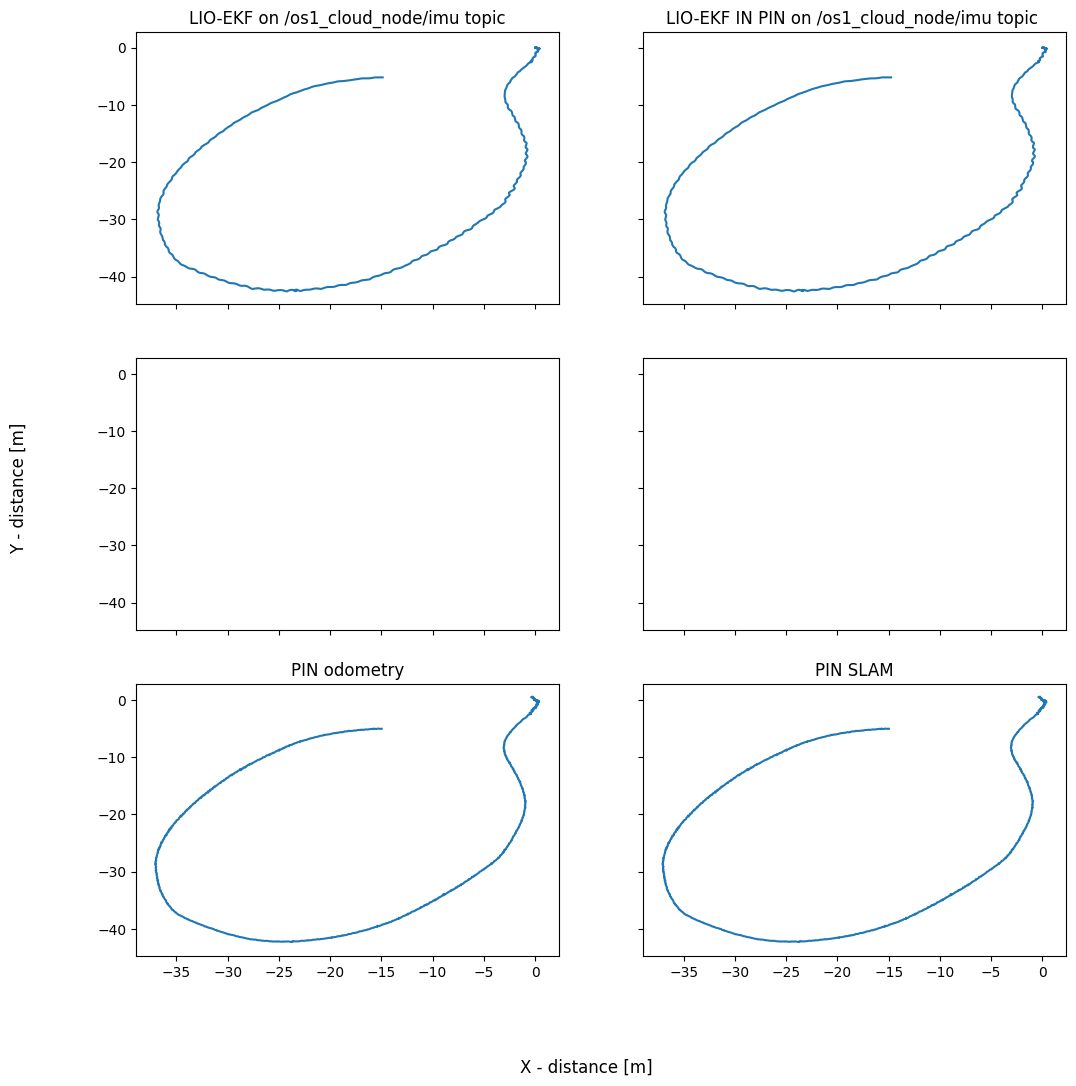

In [4]:
figure, axis = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(12, 12))

axis[0][0].plot(LIOEKF_os1_cloud_node_imu[0], LIOEKF_os1_cloud_node_imu[1])
axis[0][0].set_title("LIO-EKF on /os1_cloud_node/imu topic")
axis[0][1].plot(LIOEKF_IN_PIN_os1_cloud_node_imu[0], LIOEKF_IN_PIN_os1_cloud_node_imu[1])
axis[0][1].set_title("LIO-EKF IN PIN on /os1_cloud_node/imu topic ")
# axis[1][0].plot(LIOEKF_IN_PIN_camera_imu[0], LIOEKF_IN_PIN_camera_imu[1])
# axis[1][0].set_title("LIO-EKF IN PIN on /camera/imu topic")
# axis[1][1].plot(LIOEKF_IN_PIN_dvs_imu[0], LIOEKF_IN_PIN_dvs_imu[1])
# axis[1][1].set_title("LIO-EKF IN PIN on /dvs/imu topic")
axis[2][0].plot(pin_odom[0], pin_odom[1])
axis[2][0].set_title("PIN odometry")
axis[2][1].plot(pin_slam[0], pin_slam[1])
axis[2][1].set_title("PIN SLAM")

figure.supxlabel('X - distance [m]')
figure.supylabel('Y - distance [m]')
plt.show()

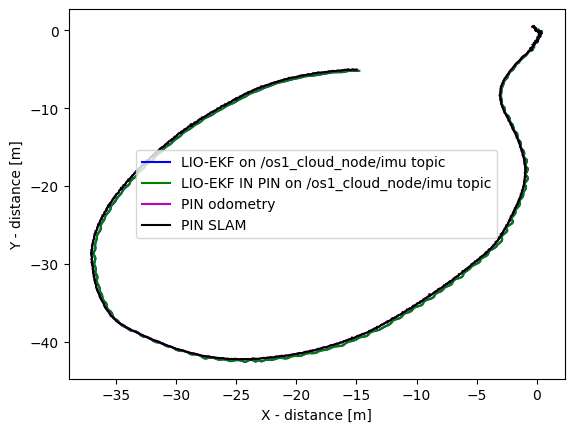

In [5]:
plt.plot(LIOEKF_os1_cloud_node_imu[0], LIOEKF_os1_cloud_node_imu[1], label='LIO-EKF on /os1_cloud_node/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node_imu[0], LIOEKF_IN_PIN_os1_cloud_node_imu[1], label='LIO-EKF IN PIN on /os1_cloud_node/imu topic', color='g') 
# plt.plot(LIOEKF_IN_PIN_camera_imu[0], LIOEKF_IN_PIN_camera_imu[1], label='LIO-EKF IN PIN on /camera/imu topic', color='r') 
# plt.plot(LIOEKF_IN_PIN_dvs_imu[0], LIOEKF_IN_PIN_dvs_imu[1], label='LIO-EKF IN PIN on /dvs/imu topic', color='c') 
plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (22, 22)

plt.xlabel('X - distance [m]')
plt.ylabel('Y - distance [m]')
plt.show()

In [6]:
# plt.plot(LIOEKF_handsfree_imu[0], LIOEKF_handsfree_imu[1], label='LIO-EKF on /handsfree/imu topic', color='b') 
# plt.plot(LIOEKF_IN_PIN_handsfree_imu[0], LIOEKF_IN_PIN_handsfree_imu[1], label='LIO-EKF IN PIN on /handsfree/imu topic', color='g') 
# # plt.plot(LIOEKF_IN_PIN_camera_imu[0], LIOEKF_IN_PIN_camera_imu[1], label='LIO-EKF IN PIN on /camera/imu topic', color='r') 
# # plt.plot(LIOEKF_IN_PIN_dvs_imu[0], LIOEKF_IN_PIN_dvs_imu[1], label='LIO-EKF IN PIN on /dvs/imu topic', color='c') 
# plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
# plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

# plt.legend()
# plt.rcParams["figure.figsize"] = (20, 20)

# plt.xlabel('X - distance [m]')
# plt.ylabel('Y - distance [m]')
# plt.show()

In [7]:
# plt.plot(LIOEKF_handsfree_imu[0], LIOEKF_handsfree_imu[1], label='LIO-EKF on /handsfree/imu topic', color='b') 
# # plt.plot(LIOEKF_IN_PIN_handsfree_imu[0], LIOEKF_IN_PIN_handsfree_imu[1], label='LIO-EKF IN PIN on /handsfree/imu topic', color='g') 
# # plt.plot(LIOEKF_IN_PIN_camera_imu[0], LIOEKF_IN_PIN_camera_imu[1], label='LIO-EKF IN PIN on /camera/imu topic', color='r') 
# # plt.plot(LIOEKF_IN_PIN_dvs_imu[0], LIOEKF_IN_PIN_dvs_imu[1], label='LIO-EKF IN PIN on /dvs/imu topic', color='c') 
# plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
# # plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

# plt.legend()
# plt.rcParams["figure.figsize"] = (20, 20)

# plt.xlabel('X - distance [m]')
# plt.ylabel('Y - distance [m]')
# plt.show()

In [8]:
# plt.plot(LIOEKF_handsfree_imu[0], LIOEKF_handsfree_imu[1], label='LIO-EKF on /handsfree/imu topic', color='b') 
# plt.plot(LIOEKF_IN_PIN_handsfree_imu[0], LIOEKF_IN_PIN_handsfree_imu[1], label='LIO-EKF IN PIN on /handsfree/imu topic', color='g') 
# # plt.plot(LIOEKF_IN_PIN_camera_imu[0], LIOEKF_IN_PIN_camera_imu[1], label='LIO-EKF IN PIN on /camera/imu topic', color='r') 
# # plt.plot(LIOEKF_IN_PIN_dvs_imu[0], LIOEKF_IN_PIN_dvs_imu[1], label='LIO-EKF IN PIN on /dvs/imu topic', color='c') 
# plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
# # plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

# plt.legend()
# plt.rcParams["figure.figsize"] = (20, 20)

# plt.xlabel('X - distance [m]')
# plt.ylabel('Y - distance [m]')
# plt.show()

In [9]:
# plt.plot(LIOEKF_handsfree_imu[0], LIOEKF_handsfree_imu[1], label='LIO-EKF on /handsfree/imu topic', color='b') 
# # plt.plot(LIOEKF_IN_PIN_handsfree_imu[0], LIOEKF_IN_PIN_handsfree_imu[1], label='LIO-EKF IN PIN on /handsfree/imu topic', color='g') 
# plt.plot(LIOEKF_IN_PIN_camera_imu[0], LIOEKF_IN_PIN_camera_imu[1], label='LIO-EKF IN PIN on /camera/imu topic', color='r') 
# plt.plot(LIOEKF_IN_PIN_dvs_imu[0], LIOEKF_IN_PIN_dvs_imu[1], label='LIO-EKF IN PIN on /dvs/imu topic', color='c') 
# plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
# # plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

# plt.legend()
# plt.rcParams["figure.figsize"] = (20, 20)

# plt.xlabel('X - distance [m]')
# plt.ylabel('Y - distance [m]')
# plt.show()

In [10]:
# plt.plot(LIOEKF_os1_cloud_node_imu[0], LIOEKF_os1_cloud_node_imu[1], label='LIO-EKF on /handsfree/imu topic', color='b') 
# # plt.plot(LIOEKF_IN_PIN_handsfree_imu[0], LIOEKF_IN_PIN_handsfree_imu[1], label='LIO-EKF IN PIN on /handsfree/imu topic', color='g') 
# # plt.plot(LIOEKF_IN_PIN_camera_imu[0], LIOEKF_IN_PIN_camera_imu[1], label='LIO-EKF IN PIN on /camera/imu topic', color='r') 
# # plt.plot(LIOEKF_IN_PIN_dvs_imu[0], LIOEKF_IN_PIN_dvs_imu[1], label='LIO-EKF IN PIN on /dvs/imu topic', color='c') 
# # plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
# plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

# plt.legend()
# plt.rcParams["figure.figsize"] = (20, 20)

# plt.xlabel('X - distance [m]')
# plt.ylabel('Y - distance [m]')
# plt.show()

# PLOT HEIGHT

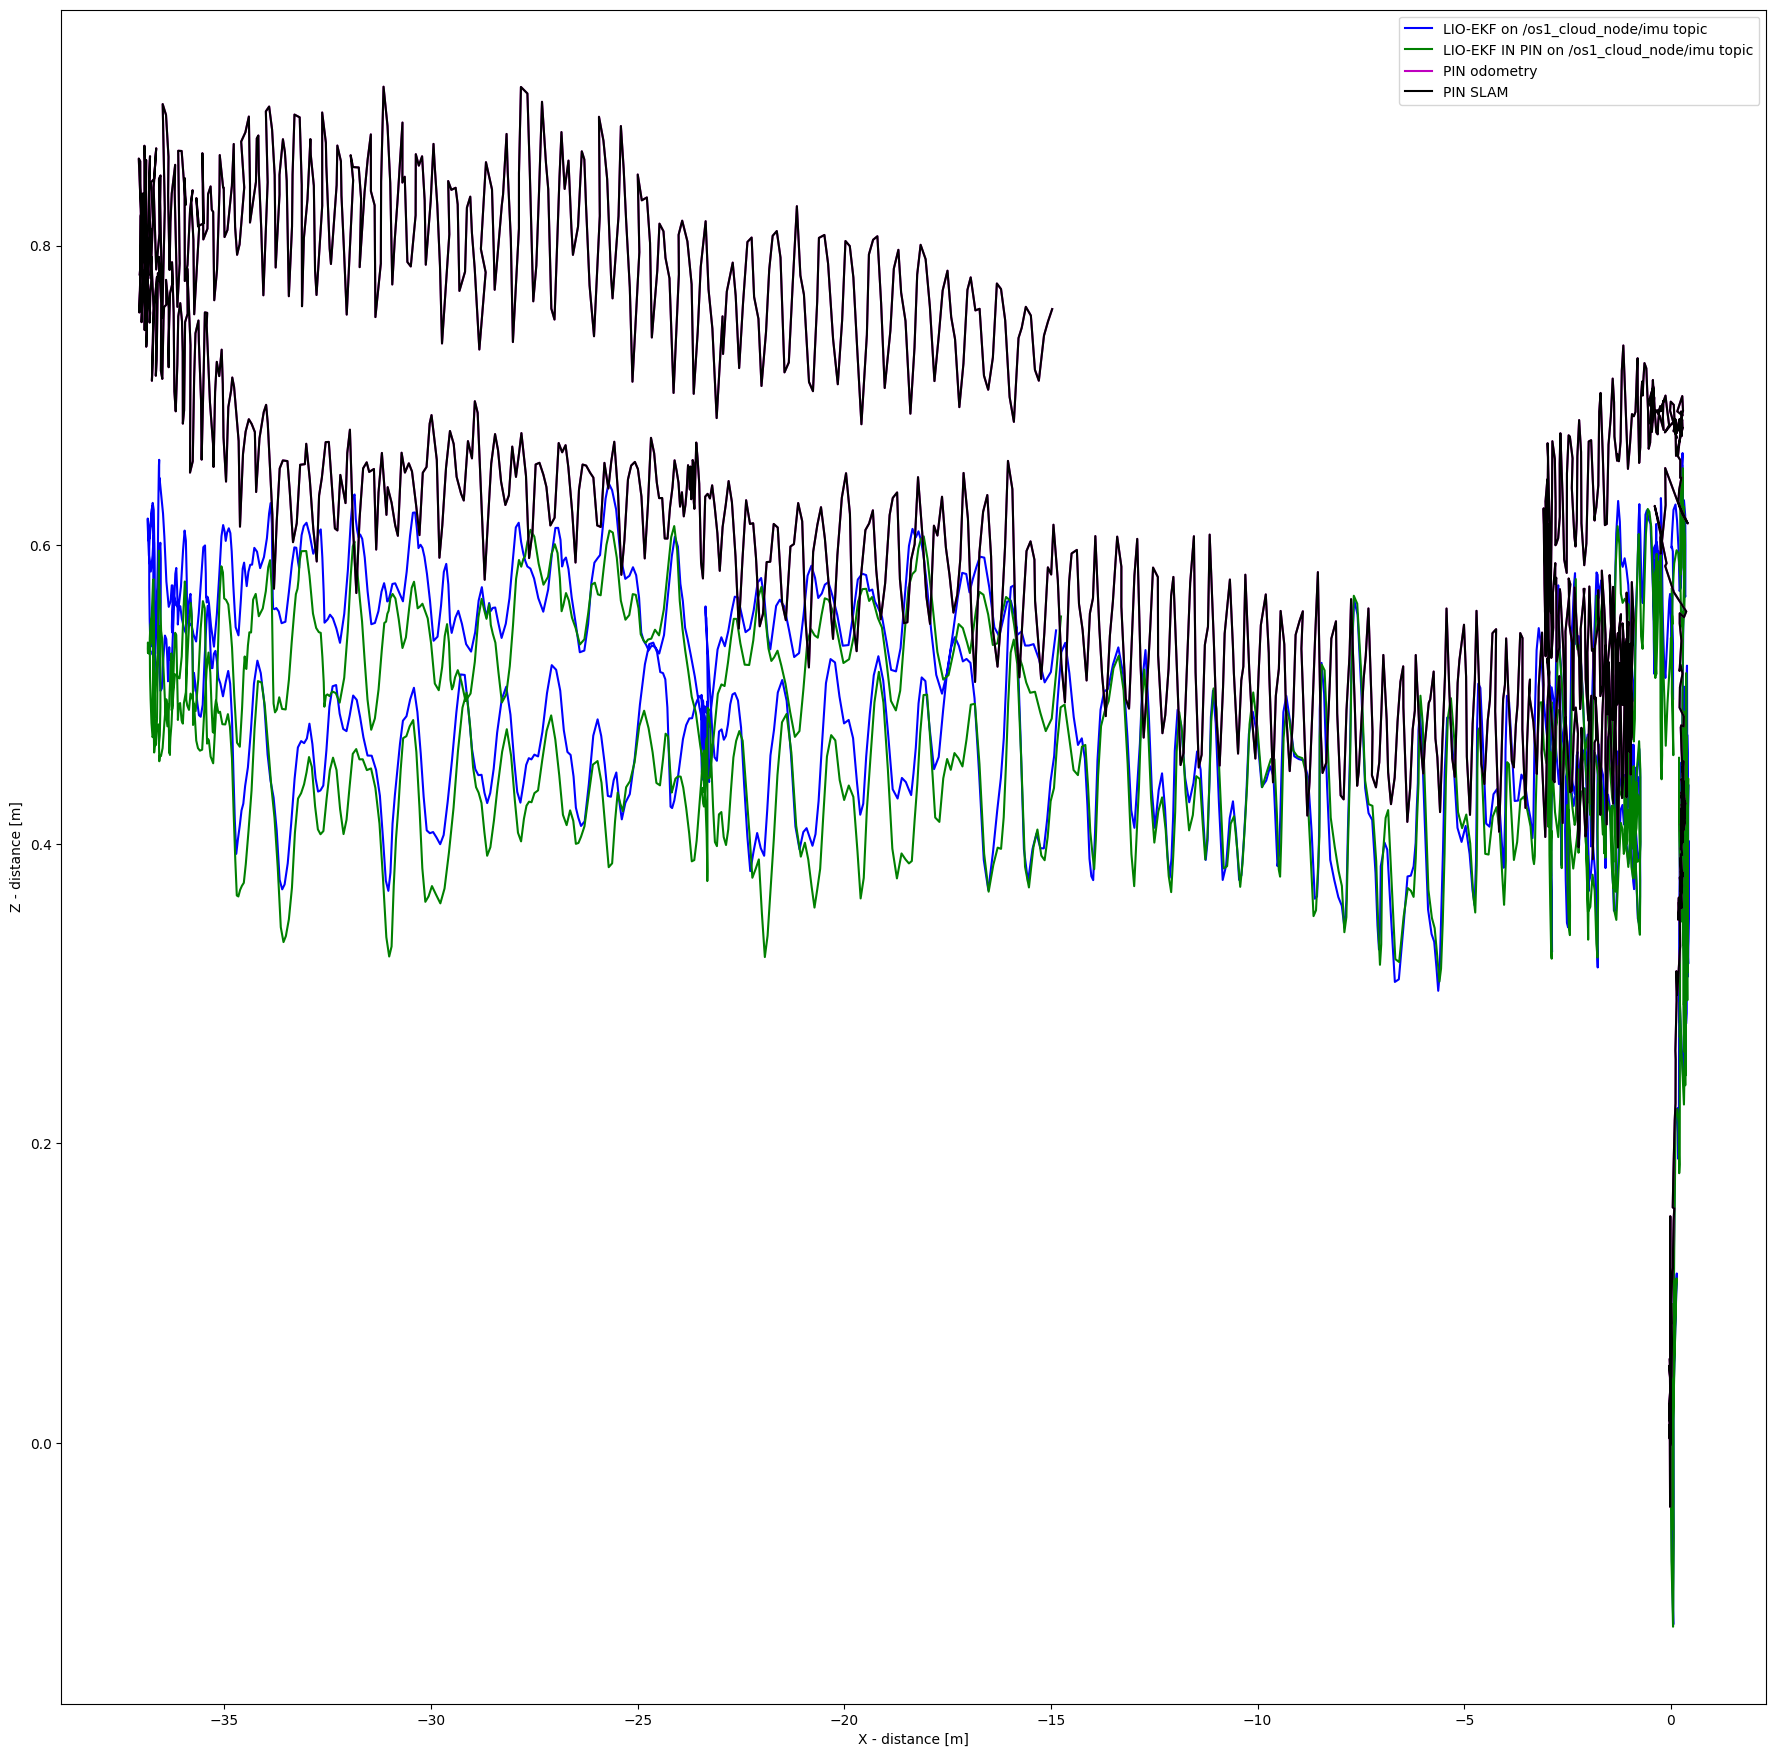

In [11]:
plt.plot(LIOEKF_os1_cloud_node_imu[0], LIOEKF_os1_cloud_node_imu[2], label='LIO-EKF on /os1_cloud_node/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node_imu[0], LIOEKF_IN_PIN_os1_cloud_node_imu[2], label='LIO-EKF IN PIN on /os1_cloud_node/imu topic', color='g') 
# plt.plot(LIOEKF_IN_PIN_camera_imu[0], LIOEKF_IN_PIN_camera_imu[2], label='LIO-EKF IN PIN on /camera/imu topic', color='r') 
# plt.plot(LIOEKF_IN_PIN_dvs_imu[0], LIOEKF_IN_PIN_dvs_imu[2], label='LIO-EKF IN PIN on /dvs/imu topic', color='c') 
plt.plot(pin_odom[0], pin_odom[2], label='PIN odometry', color='m') 
plt.plot(pin_slam[0], pin_slam[2], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (20, 20)

plt.xlabel('X - distance [m]')
plt.ylabel('Z - distance [m]')
plt.show()